In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
column_names = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df = pd.read_csv("../data/nasdaq/AMZN.csv",skiprows=3,names=column_names)
df.head(10)

,Date,Close,High,Low,Open,Volume
0,2010-01-04,6.6950,6.8305,6.6570,6.8125,151998000
1,2010-01-05,6.7345,6.7740,6.5905,6.6715,177038000
2,2010-01-06,6.6125,6.7365,6.5825,6.7300,143576000
3,2010-01-07,6.5000,6.6160,6.4400,6.6005,220604000
4,2010-01-08,6.6760,6.6840,6.4515,6.5280,196610000
5,2010-01-11,6.5155,6.6400,6.4605,6.6310,175588000
6,2010-01-12,6.3675,6.4910,6.3275,6.4495,181926000
7,2010-01-13,6.4555,6.4855,6.2875,6.3950,214464000
8,2010-01-14,6.3675,6.5190,6.3200,6.4570,195498000
9,2010-01-15,6.3570,6.4825,6.3530,6.4590,307530000


In [11]:
#convert date and set index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.head(10)

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,6.6950,6.8305,6.6570,6.8125,151998000
2010-01-05,6.7345,6.7740,6.5905,6.6715,177038000
2010-01-06,6.6125,6.7365,6.5825,6.7300,143576000
2010-01-07,6.5000,6.6160,6.4400,6.6005,220604000
2010-01-08,6.6760,6.6840,6.4515,6.5280,196610000
2010-01-11,6.5155,6.6400,6.4605,6.6310,175588000
2010-01-12,6.3675,6.4910,6.3275,6.4495,181926000
2010-01-13,6.4555,6.4855,6.2875,6.3950,214464000
2010-01-14,6.3675,6.5190,6.3200,6.4570,195498000


In [12]:
df = df.apply(pd.to_numeric,errors='coerce')

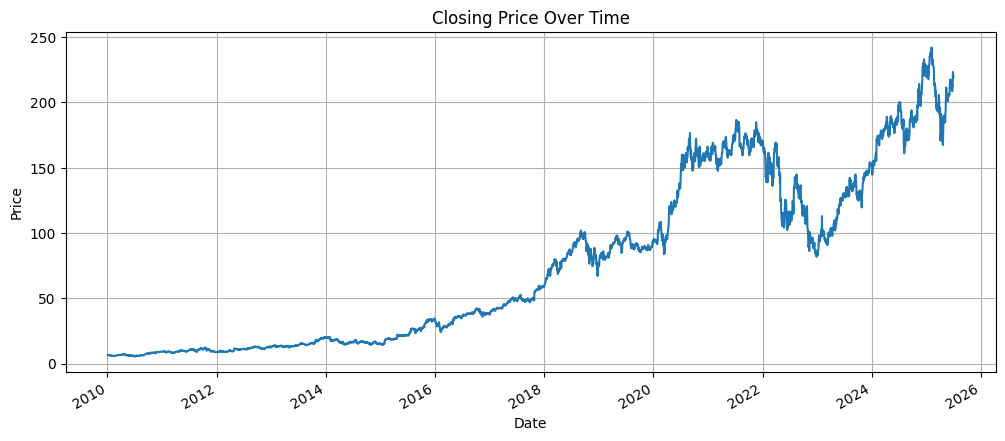

In [13]:
df['Close'].plot(figsize=(12,5),title='Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [14]:
df['Close'].std

<bound method Series.std of Date
2010-01-04      6.695000
2010-01-05      6.734500
2010-01-06      6.612500
2010-01-07      6.500000
2010-01-08      6.676000
                 ...    
2025-06-24    212.770004
2025-06-25    211.990005
2025-06-26    217.119995
2025-06-27    223.300003
2025-06-30    219.389999
Name: Close, Length: 3896, dtype: float64>

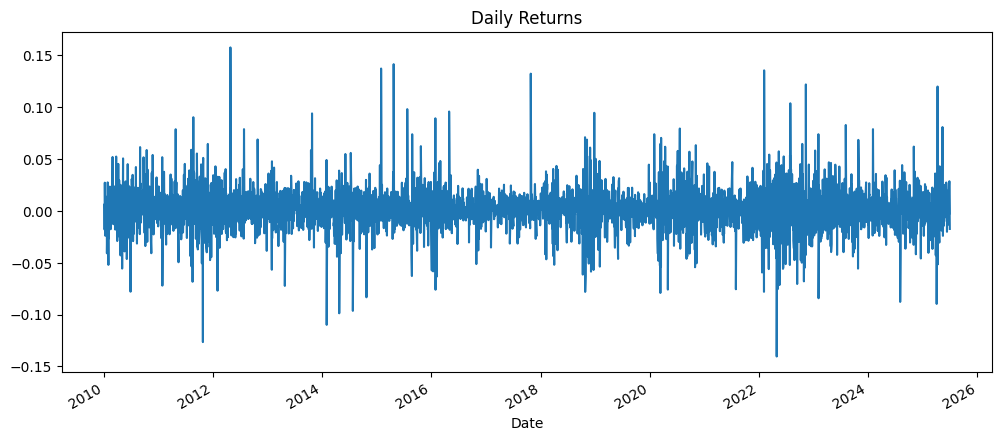

In [15]:
#Calculate Daily Return
df['Daily Return'] = df['Close'].pct_change()
df['Daily Return'].plot(figsize=(12, 5), title='Daily Returns')
plt.show()

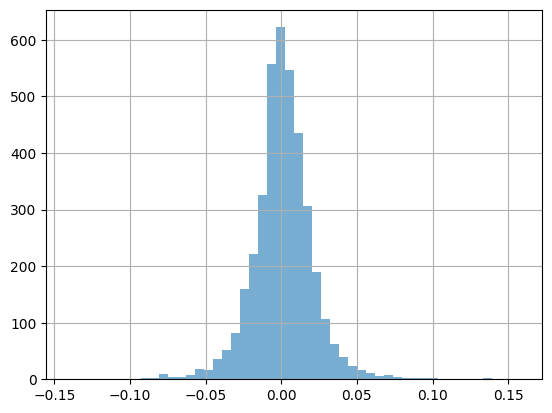

In [16]:
df['Daily Return'].hist(bins=50, alpha=0.6)
plt.show()

In [17]:
#Calculate Moving Average
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df.head()

,Close,High,Low,Open,Volume,Daily Return,MA20,MA50
Date,,,,,,,,
2010-01-04,6.6950,6.8305,6.6570,6.8125,151998000,NaN,NaN,NaN
2010-01-05,6.7345,6.7740,6.5905,6.6715,177038000,0.005900,NaN,NaN
2010-01-06,6.6125,6.7365,6.5825,6.7300,143576000,-0.018116,NaN,NaN
2010-01-07,6.5000,6.6160,6.4400,6.6005,220604000,-0.017013,NaN,NaN
2010-01-08,6.6760,6.6840,6.4515,6.5280,196610000,0.027077,NaN,NaN


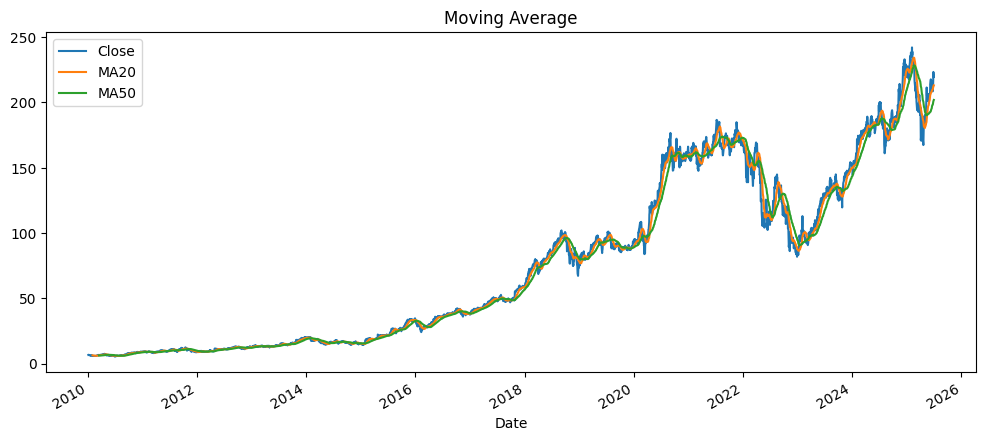

In [18]:
df[['Close','MA20','MA50']].plot(figsize=(12,5),title='Moving Average')
plt.show()

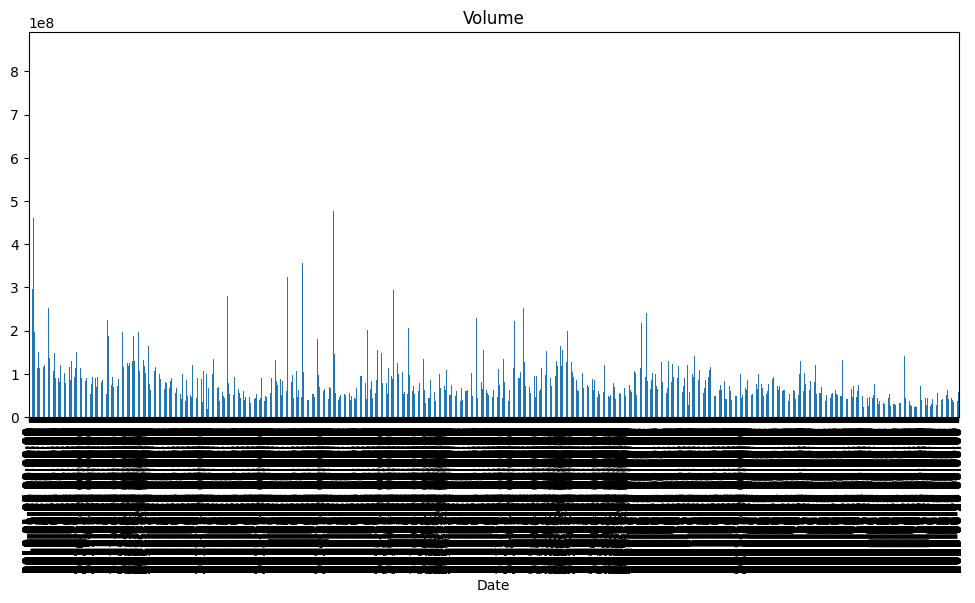

In [19]:
df['Volume'].plot(kind='bar',figsize=(12,5),title='Volume')
plt.show()

Text(0.5, 1.0, 'Price and Volume')

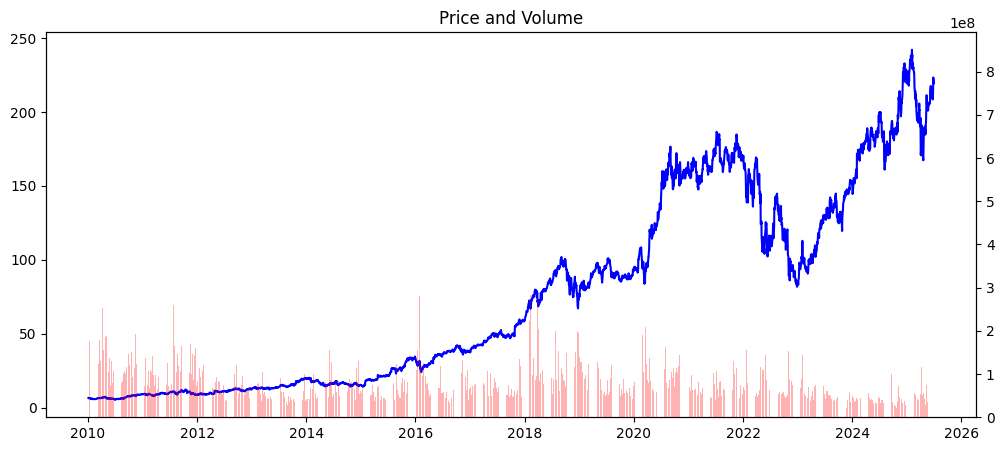

In [20]:
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(df['Close'],color='blue')
ax2 = ax1.twinx()
ax2.bar(df.index,df['Volume'],color='red',alpha=0.3)
ax1.set_title('Price and Volume')

In [21]:
df['Range'] = df['High'] - df['Low']

In [22]:
df.to_csv("../cleaned_data/AMZL.csv")